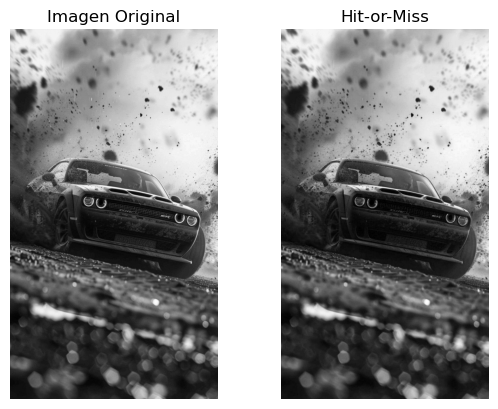

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen binaria
image = cv2.imread('Mustan.jfif', cv2.IMREAD_GRAYSCALE)


kernel1 = np.array([[0, 1, 0],
                    [1, 1, 1],
                    [0, 1, 0]], np.uint8)
kernel2 = np.array([[1, 0, 1],
                    [0, 0, 0],
                    [1, 0, 1]], np.uint8)


hit_or_miss = cv2.morphologyEx(image, cv2.MORPH_HITMISS, kernel1)


plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hit_or_miss, cmap='gray')
plt.title('Hit-or-Miss')
plt.axis('off')

plt.show()


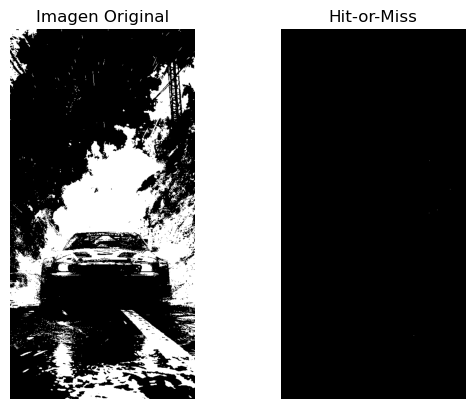

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, morphology

image = io.imread('Coche.jfif', as_gray=True)
image = image > 0.5

selem1 = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)
selem2 = np.array([[1, 0, 1],
                   [0, 0, 0],
                   [1, 0, 1]], dtype=np.uint8)

image_inv = np.logical_not(image)

erosion1 = morphology.erosion(image, selem1)
erosion2 = morphology.erosion(image_inv, selem2)


hit_or_miss = np.logical_and(erosion1, erosion2)

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hit_or_miss, cmap='gray')
plt.title('Hit-or-Miss')
plt.axis('off')

plt.show()



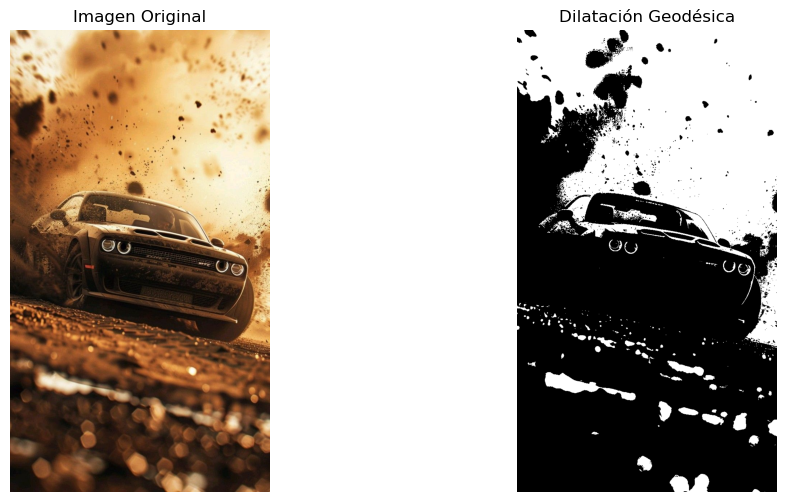

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology, io

image = io.imread('Mustan.jfif')
binary_image = np.mean(image, axis=2) > 127
mask = np.copy(binary_image)
selem = morphology.disk(5)
dilated = morphology.reconstruction(binary_image, mask, method='dilation')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilated, cmap='gray')
plt.title('Dilatación Geodésica')
plt.axis('off')

plt.show()


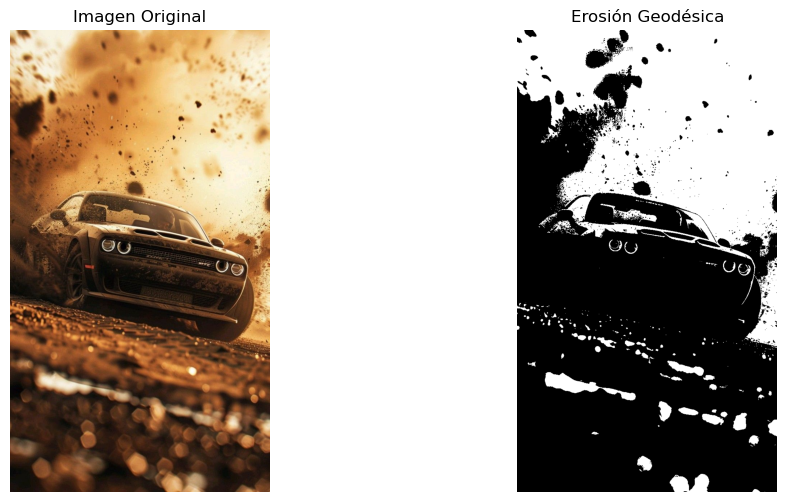

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology, io

image = io.imread('Mustan.jfif')
binary_image = np.mean(image, axis=2) > 127
mask = np.copy(binary_image)
selem = morphology.disk(5)
eroded = morphology.reconstruction(mask, binary_image, method='erosion')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(eroded, cmap='gray')
plt.title('Erosión Geodésica')
plt.axis('off')

plt.show()
